In [55]:
import pandas as pd 

In [56]:
df = pd.read_csv('spam[1].csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [57]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [58]:
df.shape

(5572, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [60]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)

In [61]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
     


In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
    

In [64]:
df['target']=encoder.fit_transform(df['target'])
     

In [65]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [66]:
df.isna().sum()

target    0
text      0
dtype: int64

In [67]:
df.duplicated().sum()


403

In [68]:
df=df.drop_duplicates(keep="first")


In [69]:
df.duplicated().sum()


0

In [70]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [71]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

In [72]:
import matplotlib.pyplot as plt

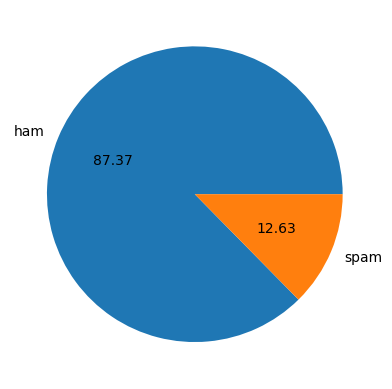

In [73]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
     

In [74]:
import nltk


In [75]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
df['num_char']=df['text'].apply(len)


C:\Users\shrey\AppData\Local\Temp\ipykernel_20840\2137151369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['text'].apply(len)


In [77]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [78]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


C:\Users\shrey\AppData\Local\Temp\ipykernel_20840\1901684428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [79]:
df

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [80]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


C:\Users\shrey\AppData\Local\Temp\ipykernel_20840\4264756061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [81]:
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [82]:
df[['num_char','num_words','num_sent']].describe()


,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [83]:
df[df['target']==0][['num_char','num_words','num_sent']].describe() #ham


,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [84]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()  #spam


,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [85]:
import seaborn as sns


<AxesSubplot:xlabel='num_char', ylabel='Count'>

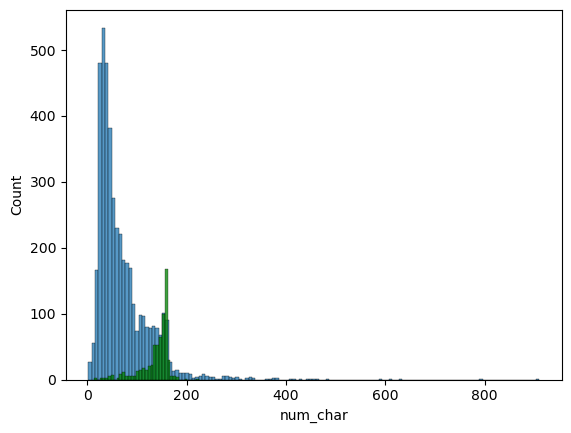

In [86]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='green')


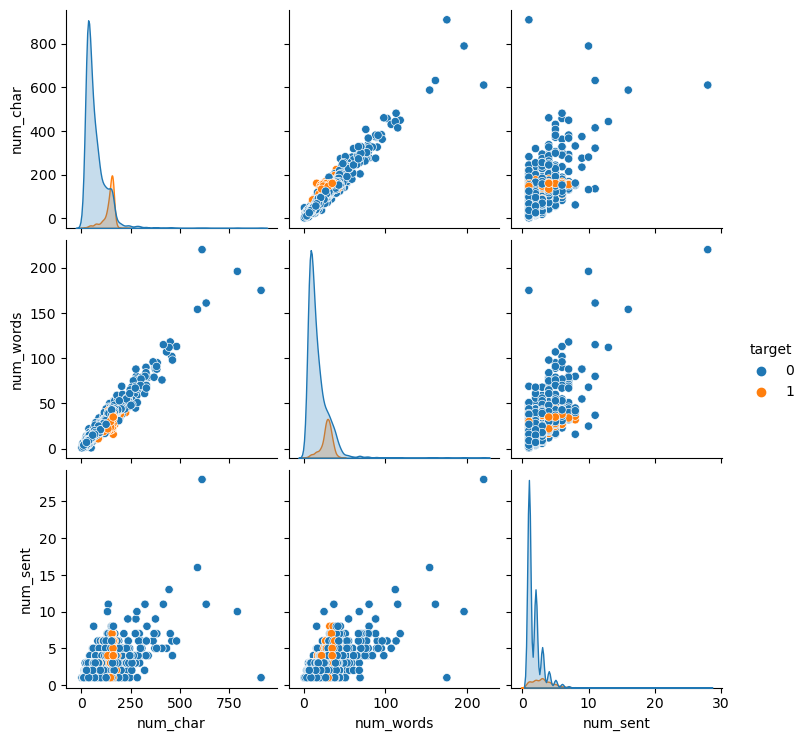

In [87]:
sns.pairplot(df,hue='target')


<AxesSubplot:>

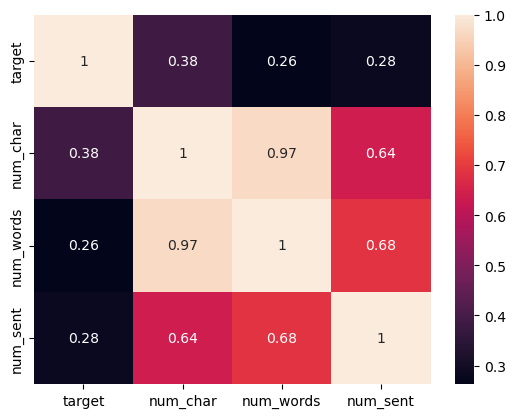

In [88]:
sns.heatmap(df.corr(),annot=True)


In [89]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [90]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
def preprocess_text(text):
    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.isalnum()]

    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text
df['preprocessed_text'] = df['text'].apply(preprocess_text)

C:\Users\shrey\AppData\Local\Temp\ipykernel_20840\2031593477.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['preprocessed_text'] = df['text'].apply(preprocess_text)


In [92]:
df

,target,text,num_char,num_words,num_sent,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [93]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [94]:
from wordcloud import WordCloud


In [95]:
wc = WordCloud(
    width=500,            
    height=500,           
    min_font_size=10,     
    background_color='white'  
)

In [96]:
spam_wc=wc.generate(df[df['target']==1]['preprocessed_text'].str.cat(sep=" "))


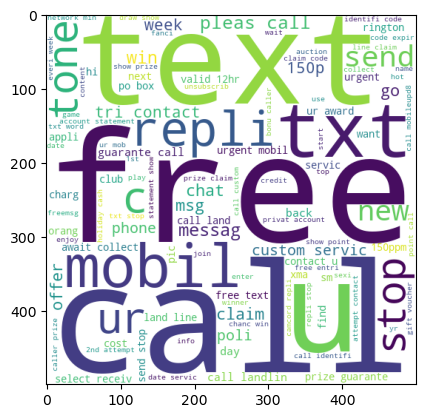

In [97]:
plt.imshow(spam_wc)

In [98]:
ham_wc=wc.generate(df[df['target']==0]['preprocessed_text'].str.cat(sep=" "))


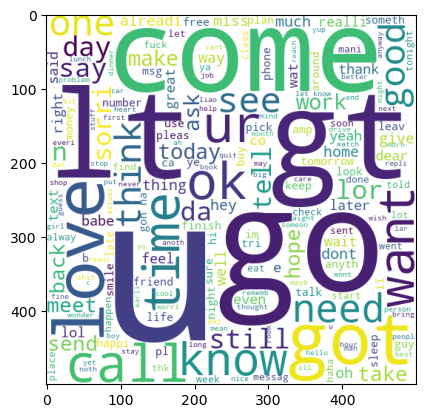

In [99]:
plt.imshow(ham_wc)


In [100]:
spam_corpus=[]
for msg in df[df['target']==1]['preprocessed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [101]:

len(spam_corpus)


9939

In [102]:
from collections import Counter


In [103]:
Counter(spam_corpus)


Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [106]:
spam_word_counts = Counter(spam_corpus)
spam_word_counts

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [104]:
df_spam=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word', 'Count'])
df_spam

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [108]:
import matplotlib.pyplot as plt


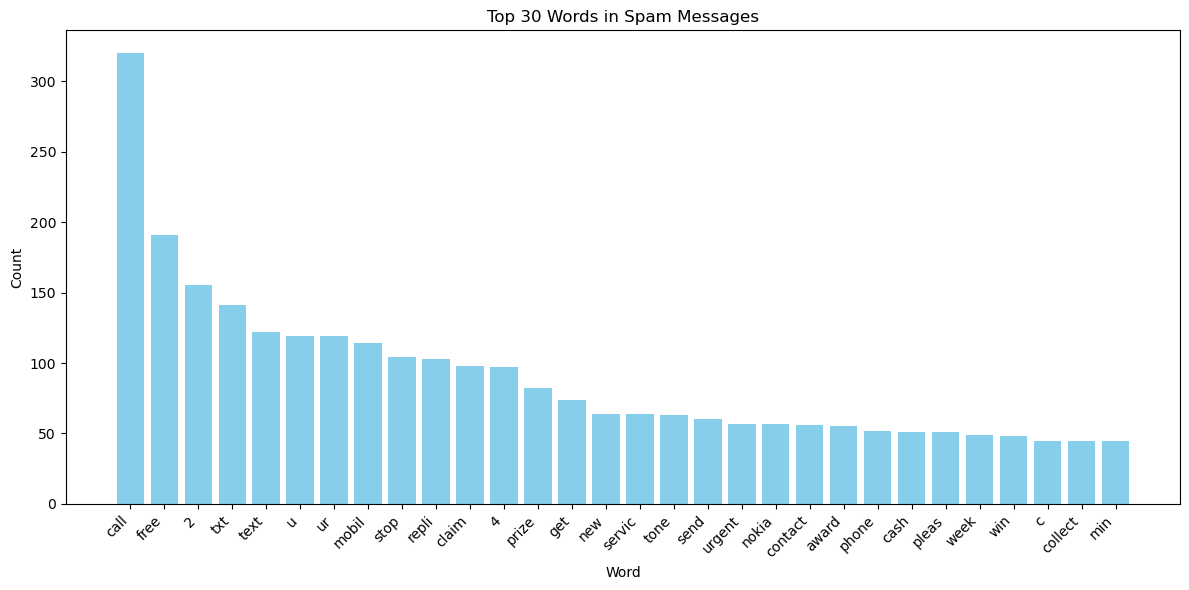

In [110]:
plt.figure(figsize=(12, 6))
plt.bar(df_spam['Word'], df_spam['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 30 Words in Spam Messages')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [111]:
ham_corpus = []

for msg in df[df['target'] == 0]['preprocessed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [112]:
len(ham_corpus)

35394

In [113]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [114]:
df_ham=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['Word', 'Count'])
df_ham

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


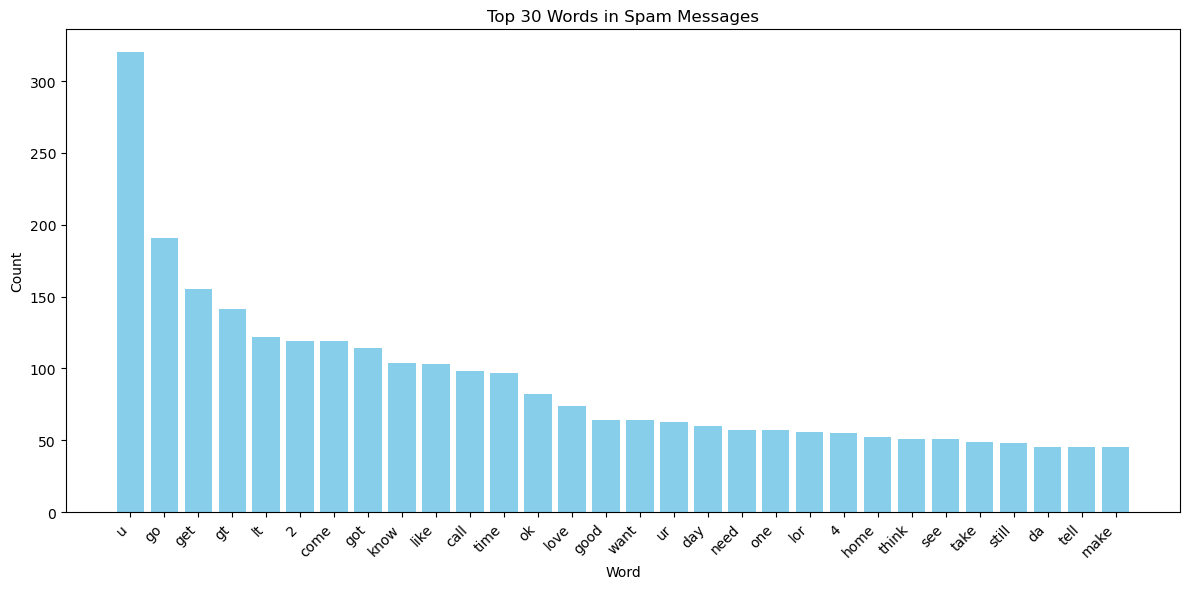

In [115]:
plt.figure(figsize=(12, 6))
plt.bar(df_ham['Word'], df_spam['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 30 Words in Spam Messages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [116]:
from sklearn.feature_extraction.text import CountVectorizer


In [117]:
count_vectorizer = CountVectorizer()


In [123]:
X = count_vectorizer.fit_transform(df['preprocessed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [129]:
y=df['target']
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

In [130]:
from sklearn.model_selection import train_test_split


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4135, 6708)
X_test shape: (1034, 6708)
y_train shape: (4135,)
y_test shape: (1034,)


In [134]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [135]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [136]:
gnb=GaussianNB()


In [137]:
gnb.fit(X_train, y_train)


GaussianNB()

In [139]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [141]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8684719535783365
0.5185185185185185


In [142]:
confusion_mat = confusion_matrix(y_test, y_pred)

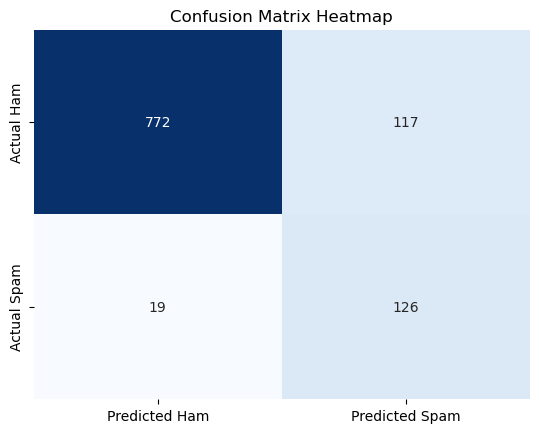

In [144]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=['Predicted Ham', 'Predicted Spam'],           yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix Heatmap")
plt.show()

In [145]:
mnb = MultinomialNB()


In [147]:
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [148]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9738878143133463
0.8881578947368421


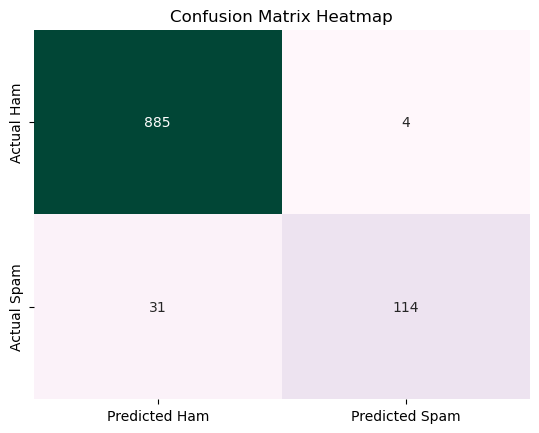

In [192]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="PuBuGn", cbar=False,xticklabels=['Predicted Ham', 'Predicted Spam'],           yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix Heatmap")
plt.show()

In [156]:
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [157]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9661508704061895
0.9661016949152542


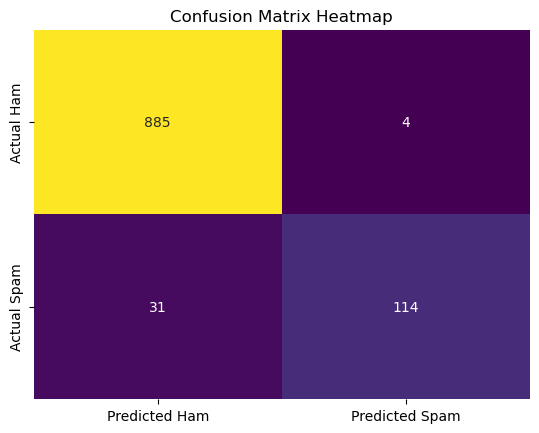

In [159]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="viridis", cbar=False,xticklabels=['Predicted Ham', 'Predicted Spam'],           yticklabels=['Actual Ham', 'Actual Spam'])
plt.title("Confusion Matrix Heatmap")
plt.show()

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [161]:
tfidf_vectorizer = TfidfVectorizer()


In [162]:
X_tfidf = tfidf_vectorizer.fit_transform(df['preprocessed_text'])


In [164]:
X_tfidf_array = X_tfidf.toarray()
X_tfidf_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
y_tfidf = df['target'].to_numpy()
y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [168]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf_array, y_tfidf, test_size=0.2, random_state=42)

In [169]:
X_train_tfidf.shape

(4135, 6708)

In [170]:
X_test_tfidf.shape

(1034, 6708)

In [171]:
y_train_tfidf.shape

(4135,)

In [172]:
y_test_tfidf.shape

(1034,)

In [188]:
def evaluate_model(model, X_train, X_test, y_train, y_test,cmap):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=['Predicted Ham', 'Predicted Spam'],
                yticklabels=['Actual Ham', 'Actual Spam'])
    plt.title("Confusion Matrix Heatmap")
    plt.show()




Gaussian Naive Bayes (TF-IDF):
Accuracy: 0.86
Precision: 0.51
Confusion Matrix:
[[772 117]
 [ 24 121]]


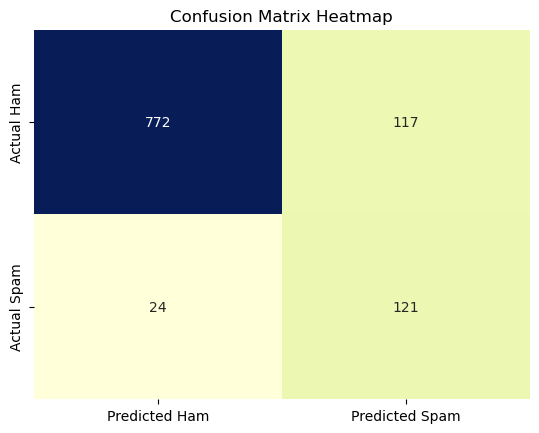

In [202]:
print("\nGaussian Naive Bayes (TF-IDF):")
gnb_tfidf = GaussianNB()
evaluate_model(gnb_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf,cmap='YlGnBu')



Multinomial Naive Bayes (TF-IDF):
Accuracy: 0.96
Precision: 0.99
Confusion Matrix:
[[888   1]
 [ 39 106]]


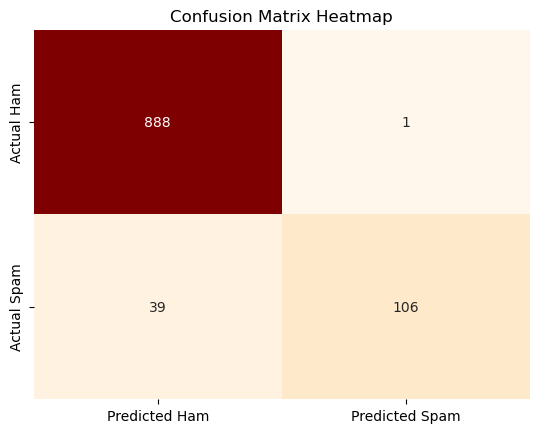

In [190]:
print("\nMultinomial Naive Bayes (TF-IDF):")
mnb_tfidf = MultinomialNB()
evaluate_model(mnb_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf,cmap="OrRd")



Bernoulli Naive Bayes (TF-IDF):
Accuracy: 0.97
Precision: 0.97
Confusion Matrix:
[[885   4]
 [ 31 114]]


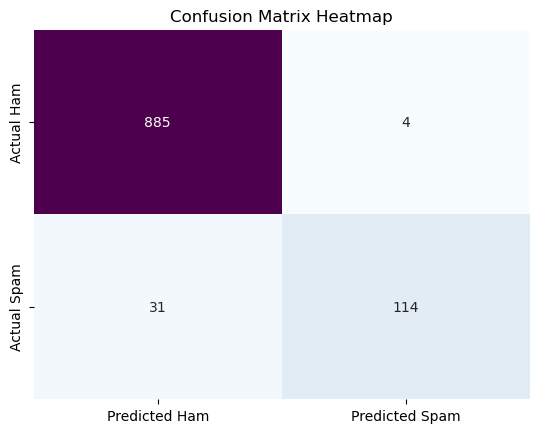

In [191]:
print("\nBernoulli Naive Bayes (TF-IDF):")
bnb_tfidf = BernoulliNB()
evaluate_model(bnb_tfidf, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf,cmap="BuPu")

In [204]:
from scipy.sparse import issparse


In [207]:
def classify_sms(sms_text, vectorizer, classifier):
    processed_sms = preprocess_text(sms_text)  # Assuming preprocess_text is your preprocessing function

    vectorized_sms = vectorizer.transform([processed_sms])

    prediction = classifier.predict(vectorized_sms)

   
    if prediction[0] == 1:
        print("The SMS is classified as spam.")
    else:
        print("The SMS is classified as not spam.")

In [208]:
user_input = input("Enter SMS to check: ")
classify_sms(user_input, tfidf_vectorizer, mnb)

Enter SMS to check:  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
The SMS is classified as spam.


In [197]:
user_input = input("Enter SMS to check: ")
classify_sms(user_input, tfidf_vectorizer, bnb)

Enter SMS to check: Rofl. Its true to its name
The SMS is classified as not spam.


In [210]:
def classify_sms(sms_text, vectorizer, classifier):
    processed_sms = preprocess_text(sms_text)  
    vectorized_sms = vectorizer.transform([processed_sms])

    if issparse(vectorized_sms):
        vectorized_sms = vectorized_sms.toarray()

    prediction = classifier.predict(vectorized_sms)

    if prediction[0] == 1:
        print("The SMS may exhibit characteristics associated with spam.")
    else:
        print("The SMS appears not to exhibit characteristics associated with spam.")

user_input = input("Enter SMS to check: ")
classify_sms(user_input, tfidf_vectorizer, gnb)

Enter SMS to check: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
The SMS may exhibit characteristics associated with spam.
